In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extracting embeddings from Wav2Vec2

In [ ]:
import os
import torch
import torchaudio
from tqdm import tqdm
from transformers import Wav2Vec2Processor, Wav2Vec2Model

positive_dir = "/content/drive/MyDrive/Phonetics_Lab/DATASET/label_1"
negative_dir = "/content/drive/MyDrive/Phonetics_Lab/DATASET/label_0"
output_path = "/content/drive/MyDrive/Phonetics_Lab/wav2vec2_embeddings.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"
processor = Wav2Vec2Processor.from_pretrained("jonatasgrosman/wav2vec2-large-xlsr-53-russian")
model = Wav2Vec2Model.from_pretrained("jonatasgrosman/wav2vec2-large-xlsr-53-russian").to(device)
model.eval()

features = []
labels = []
filenames = []

def extract_embedding_wav2vec2(filepath):
    speech_array, sr = torchaudio.load(filepath)
    if sr != 16000:
        resampler = torchaudio.transforms.Resample(sr, 16000)
        speech_array = resampler(speech_array)
    speech_array = speech_array.squeeze().numpy()
    inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = model(**inputs.to(device))
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu()  # [hidden_size]

for label, folder in [(1, positive_dir), (0, negative_dir)]:
    for fname in tqdm(os.listdir(folder), desc=f"Processing {folder}"):
        if not fname.endswith(".wav"): continue
        path = os.path.join(folder, fname)
        try:
            emb = extract_embedding_wav2vec2(path)
            features.append(emb)
            labels.append(label)
            filenames.append(fname)
        except Exception as e:
            print(f"⚠️ Failed: {fname} | Error: {e}")

torch.save({
    "embeddings": torch.stack(features),
    "labels": torch.tensor(labels),
    "filenames": filenames
}, output_path)

print(f"✅ Saved embeddings to {output_path}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_1: 100%|██████████| 4976/4976 [03:59<00:00, 20.78it/s]
Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   3%|▎         | 174/4972 [01:45<01:55, 41.63it/s]

⚠️ Failed: видео_38412558-9f77-4d5a-a74a-41bbc60f5c81_chunk3.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   5%|▌         | 254/4972 [01:47<02:14, 35.20it/s]

⚠️ Failed: люди_794768ce-a3bc-49ce-a901-a38849bfb7fd_chunk2.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   5%|▌         | 268/4972 [01:48<02:05, 37.57it/s]

⚠️ Failed: вот_67800255-cda0-410c-ad1b-b1a4e26ae394_chunk1.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   8%|▊         | 419/4972 [01:52<01:59, 38.02it/s]

⚠️ Failed: а_9ed3336a-0088-4b81-a5d8-a5aa4bf77d7d_chunk2.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   9%|▉         | 455/4972 [01:53<02:02, 37.00it/s]

⚠️ Failed: а_09ed7fea-adbf-491d-80b4-602fd48eedb6_chunk21.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  11%|█         | 523/4972 [01:54<02:08, 34.74it/s]

⚠️ Failed: ты_84cbae83-dece-4dbd-9c2e-532acbdd1f0a_chunk6.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  12%|█▏        | 593/4972 [01:57<02:36, 28.03it/s]

⚠️ Failed: на_5e9ca5a8-c757-4bcb-a60e-80fe9c950b2d_chunk4.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  14%|█▎        | 679/4972 [02:00<02:00, 35.57it/s]

⚠️ Failed: у_6a14483b-d557-44a0-a5ad-e519b6d1661f_chunk12.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  15%|█▍        | 738/4972 [02:02<01:45, 40.24it/s]

⚠️ Failed: у_037bd8e9-2731-4494-8bb7-b6b00c2f0892_chunk3.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  22%|██▏       | 1085/4972 [02:11<02:01, 32.00it/s]

⚠️ Failed: то_e55f6bd5-a3fe-478a-b29c-db777881f6c3_chunk6.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  23%|██▎       | 1132/4972 [02:13<02:22, 27.00it/s]

⚠️ Failed: будут_36ce9aa0-2113-4641-a1c9-f163ce0659b8_chunk15.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  25%|██▍       | 1230/4972 [02:16<01:39, 37.46it/s]

⚠️ Failed: у_78853007-6fa6-4089-abc2-56614bd8c248_chunk4.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  26%|██▋       | 1309/4972 [02:18<01:30, 40.48it/s]

⚠️ Failed: что_03e0ba08-5b42-4b24-9efd-00149087d712_chunk2.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  29%|██▉       | 1458/4972 [02:22<01:26, 40.41it/s]

⚠️ Failed: такие_e0fa12fe-c8e6-4e89-923d-1ed437dfe80c_chunk19.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  30%|███       | 1508/4972 [02:23<01:27, 39.46it/s]

⚠️ Failed: типа_f41676ac-bdf5-449d-81f1-faa7c6ba88b4_chunk12.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  35%|███▌      | 1762/4972 [02:32<01:20, 39.79it/s]

⚠️ Failed: наверное_29d78e1c-ec77-416b-9925-d5c884e695cb_chunk1.wav | Error: Failed to decode audio.
⚠️ Failed: Если_4ab46734-2112-4d66-8862-ae32293bef92_chunk5.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  40%|████      | 2002/4972 [02:38<01:15, 39.23it/s]

⚠️ Failed: у_20c531f4-9e6f-4cf0-bb20-70a672339d84_chunk7.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  41%|████▏     | 2061/4972 [02:39<01:11, 40.49it/s]

⚠️ Failed: до_0ccc2e18-ae07-4ce5-a74f-1c8b4a4b9e03_chunk16.wav | Error: Failed to decode audio.
⚠️ Failed: то_03e65e9b-3614-4c08-8458-6bfd1a86dfe5_chunk12.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  45%|████▌     | 2244/4972 [02:45<01:06, 41.31it/s]

⚠️ Failed: там_44e51e95-3a54-4d1f-b903-f2a271609b74_chunk10.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  46%|████▋     | 2304/4972 [02:46<01:04, 41.40it/s]

⚠️ Failed: у_e87a6a73-4a98-4d22-b15c-85bae39c4220_chunk13.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  47%|████▋     | 2335/4972 [02:47<01:01, 43.05it/s]

⚠️ Failed: и_aca631de-92f6-44a7-8c47-4ac51c47a990_chunk13.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  51%|█████     | 2544/4972 [02:52<01:01, 39.75it/s]

⚠️ Failed: а_63aa027d-f5fe-4386-a2ee-e8ca00e9aee8_chunk5.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  56%|█████▌    | 2778/4972 [02:59<00:53, 40.64it/s]

⚠️ Failed: с_f6efc680-8c36-4d92-a9f8-6237cf7935c8_chunk0.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  59%|█████▉    | 2938/4972 [03:03<00:49, 41.40it/s]

⚠️ Failed: ты_aff8dc50-2a16-4d6d-bd94-132ac49a093b_chunk1.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  61%|██████    | 3030/4972 [03:06<00:47, 41.13it/s]

⚠️ Failed: чтобы_1bf46ace-81fb-4b0f-b3c0-bfe3c6303431_chunk12.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  62%|██████▏   | 3094/4972 [03:07<00:57, 32.43it/s]

⚠️ Failed: ну_3cd481a3-5ea2-4b50-90c2-d46022020017_chunk2.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  64%|██████▍   | 3189/4972 [03:11<00:54, 32.63it/s]

⚠️ Failed: ни_caadcf16-61fd-4649-9300-e60afa3c2a6e_chunk9.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  66%|██████▌   | 3277/4972 [03:13<00:39, 42.40it/s]

⚠️ Failed: мы_56756ecd-3108-4111-8840-0aabd81dc8ce_chunk3.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  73%|███████▎  | 3647/4972 [03:23<00:48, 27.22it/s]

⚠️ Failed: да_0c65c45e-7ad3-4ec3-9d25-17d3b4b0b9d6_chunk11.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  74%|███████▎  | 3662/4972 [03:24<00:40, 32.57it/s]

⚠️ Failed: х_f87d73d0-16c6-4e51-86db-d2daea7b7bba_chunk5.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  75%|███████▌  | 3735/4972 [03:26<00:31, 39.03it/s]

⚠️ Failed: ну_d36879ed-d28c-48c4-aaf3-5674592edac0_chunk4.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  85%|████████▍ | 4220/4972 [03:40<00:18, 39.85it/s]

⚠️ Failed: все_dfd41231-52fd-4da9-bd14-5f108eabaf21_chunk3.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  92%|█████████▏| 4577/4972 [03:50<00:13, 28.39it/s]

⚠️ Failed: говорю_c3488c07-2fd1-47d8-8931-797c0bd3ad99_chunk15.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  97%|█████████▋| 4802/4972 [03:55<00:04, 40.44it/s]

⚠️ Failed: вот_33a4cffa-1840-463c-8e2e-c7ef1a11251f_chunk4.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0: 100%|██████████| 4972/4972 [04:00<00:00, 20.68it/s]


✅ Saved embeddings to /content/drive/MyDrive/Phonetics_Lab/wav2vec2_embeddings.pt


t-SNE visualization of embeddings

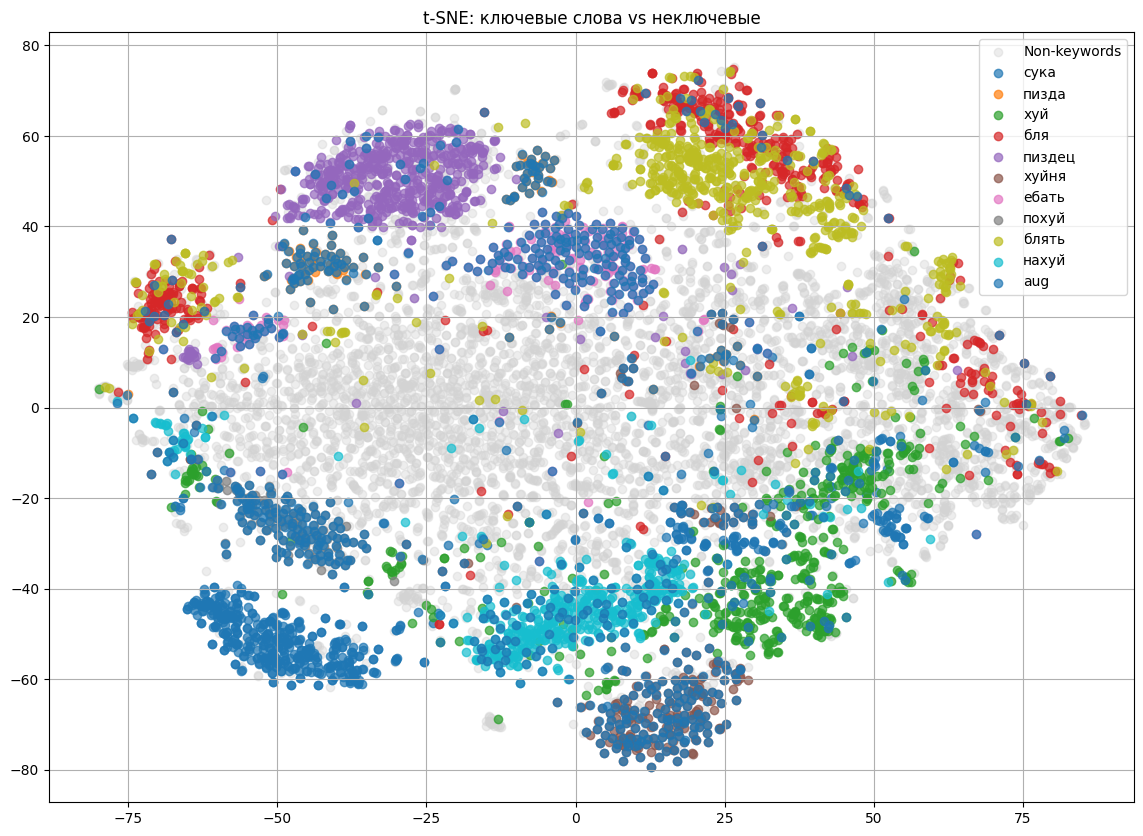

In [ ]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from collections import defaultdict

data = torch.load("/content/drive/MyDrive/Phonetics_Lab/wav2vec2_embeddings.pt")
X = data["embeddings"].numpy()
y = data["labels"].numpy()
filenames = data["filenames"]

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# Class division
X_0 = X_embedded[y == 0]
X_1 = X_embedded[y == 1]
filenames_1 = [f for i, f in enumerate(filenames) if y[i] == 1]

# Extracting a keyword from a filename
def extract_keyword(filename):
    return filename.split("_")[0].lower().split()[0]

# Grouping points of label 1 by words
word_to_points = defaultdict(list)
for i, fname in enumerate(filenames_1):
    word = extract_keyword(fname)
    word_to_points[word].append(X_1[i])

plt.figure(figsize=(14, 10))

# label 0
plt.scatter(X_0[:, 0], X_0[:, 1], c='lightgray', label="Non-keywords", alpha=0.4)

for word, points in word_to_points.items():
    points = np.array(points)
    plt.scatter(points[:, 0], points[:, 1], label=word, alpha=0.7)

plt.title("t-SNE: keywords vs non-keywords")
plt.legend()
plt.grid(True)
plt.show()

Experiments with classifiers

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

data = torch.load("/content/drive/MyDrive/Phonetics_Lab/wav2vec2_embeddings.pt")
X = data["embeddings"]
y = data["labels"].float()

total_len = len(X)
train_len = int(0.8 * total_len)
val_len = int(0.1 * total_len)
test_len = total_len - train_len - val_len

dataset = TensorDataset(X, y)
train_set, val_set, test_set = random_split(dataset, [train_len, val_len, test_len])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

# Classifiers
class CosineClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, input_dim))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        x = F.normalize(x, dim=-1)
        w = F.normalize(self.weight, dim=-1)
        return F.linear(x, w) + self.bias

class LinearClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x).squeeze()

class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.net(x).squeeze()

# Learning
def train_model(model, train_loader, val_loader, epochs=10, lr=1e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    history = {"train_loss": [], "val_loss": [], "val_acc": [], "val_f1": []}

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb).squeeze()
            loss = criterion(logits, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss, preds, targets = 0, [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                logits = model(xb).squeeze()
                loss = criterion(logits, yb)
                val_loss += loss.item()
                probs = torch.sigmoid(logits)
                pred = (probs > 0.5).cpu()
                preds += pred.tolist()
                targets += yb.cpu().tolist()

        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)
        history["train_loss"].append(train_loss / len(train_loader))
        history["val_loss"].append(val_loss / len(val_loader))
        history["val_acc"].append(acc)
        history["val_f1"].append(f1)
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Val Acc={acc:.3f}, F1={f1:.3f}")

    return history


In [ ]:
def plot_history(history, title_suffix=""):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(epochs, history["train_loss"], label="Train")
    plt.plot(epochs, history["val_loss"], label="Val")
    plt.title("Loss" + title_suffix)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(epochs, history["val_acc"], label="Val Acc")
    plt.title("Accuracy" + title_suffix)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.subplot(1, 3, 3)
    plt.plot(epochs, history["val_f1"], label="Val F1")
    plt.title("F1 Score" + title_suffix)
    plt.xlabel("Epoch")
    plt.ylabel("F1")

    plt.tight_layout()
    plt.show()

In [ ]:
def evaluate(model, loader, name="Model"):
    model.eval()
    preds, targets, probs = [], [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            logits = model(xb)
            prob = torch.sigmoid(logits).cpu()
            pred = (prob > 0.5).int()
            preds += pred.tolist()
            targets += yb.int().tolist()
            probs += prob.tolist()

    acc = accuracy_score(targets, preds)
    prec = precision_score(targets, preds)
    rec = recall_score(targets, preds)
    f1 = f1_score(targets, preds)

    print(f"\n🔍 Test ({name}): Acc={acc:.3f}  Prec={prec:.3f}  Rec={rec:.3f}  F1={f1:.3f}")

    plt.figure(figsize=(6, 4))
    plt.hist([p for p, t in zip(probs, targets) if t == 1], bins=20, alpha=0.6, label="Keyword")
    plt.hist([p for p, t in zip(probs, targets) if t == 0], bins=20, alpha=0.6, label="Non-keyword")
    plt.xlabel("Predicted probability")
    plt.title(f"Prediction Distribution: {name}")
    plt.legend()
    plt.grid(True)
    plt.show()


Epoch 1: Train Loss=172.1558, Val Loss=21.5142, Val Acc=0.473, F1=0.365
Epoch 2: Train Loss=172.0915, Val Loss=21.5062, Val Acc=0.490, F1=0.428
Epoch 3: Train Loss=172.0284, Val Loss=21.4986, Val Acc=0.483, F1=0.451
Epoch 4: Train Loss=171.9676, Val Loss=21.4909, Val Acc=0.481, F1=0.485
Epoch 5: Train Loss=171.9052, Val Loss=21.4836, Val Acc=0.483, F1=0.508
Epoch 6: Train Loss=171.8465, Val Loss=21.4764, Val Acc=0.494, F1=0.534
Epoch 7: Train Loss=171.7859, Val Loss=21.4694, Val Acc=0.508, F1=0.564
Epoch 8: Train Loss=171.7255, Val Loss=21.4624, Val Acc=0.527, F1=0.590
Epoch 9: Train Loss=171.6688, Val Loss=21.4554, Val Acc=0.532, F1=0.601
Epoch 10: Train Loss=171.6090, Val Loss=21.4485, Val Acc=0.543, F1=0.618


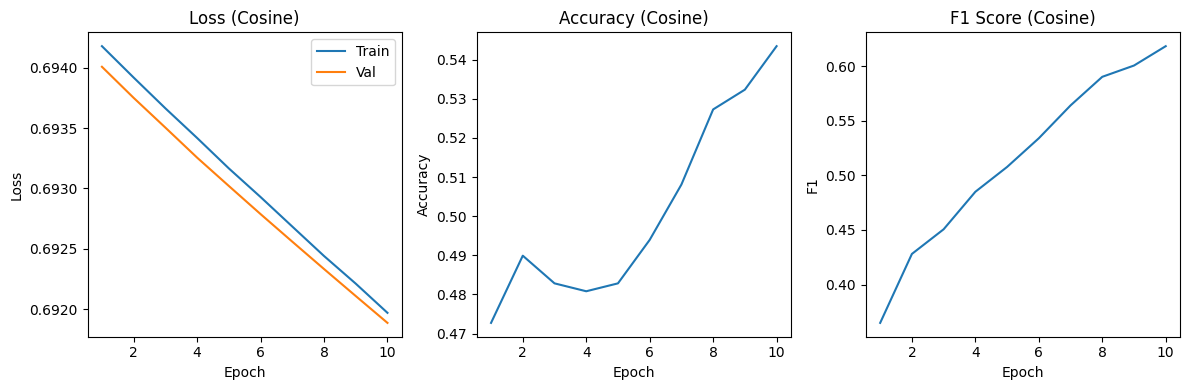


🔍 Test (Cosine): Acc=0.546  Prec=0.535  Rec=0.716  F1=0.613


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


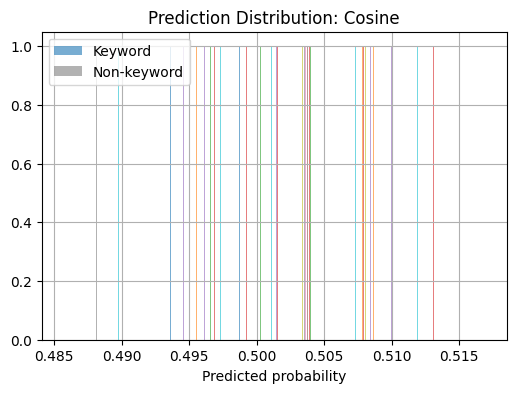

Epoch 1: Train Loss=167.0024, Val Loss=20.3241, Val Acc=0.661, F1=0.679
Epoch 2: Train Loss=157.8547, Val Loss=19.4355, Val Acc=0.679, F1=0.717
Epoch 3: Train Loss=151.2136, Val Loss=18.7112, Val Acc=0.732, F1=0.736
Epoch 4: Train Loss=146.0074, Val Loss=18.0906, Val Acc=0.749, F1=0.760
Epoch 5: Train Loss=141.6344, Val Loss=17.5830, Val Acc=0.767, F1=0.768
Epoch 6: Train Loss=137.8847, Val Loss=17.1350, Val Acc=0.779, F1=0.792
Epoch 7: Train Loss=134.7144, Val Loss=16.7474, Val Acc=0.782, F1=0.786
Epoch 8: Train Loss=131.8989, Val Loss=16.4256, Val Acc=0.785, F1=0.798
Epoch 9: Train Loss=129.6094, Val Loss=16.1253, Val Acc=0.788, F1=0.792
Epoch 10: Train Loss=127.3727, Val Loss=15.8685, Val Acc=0.791, F1=0.801


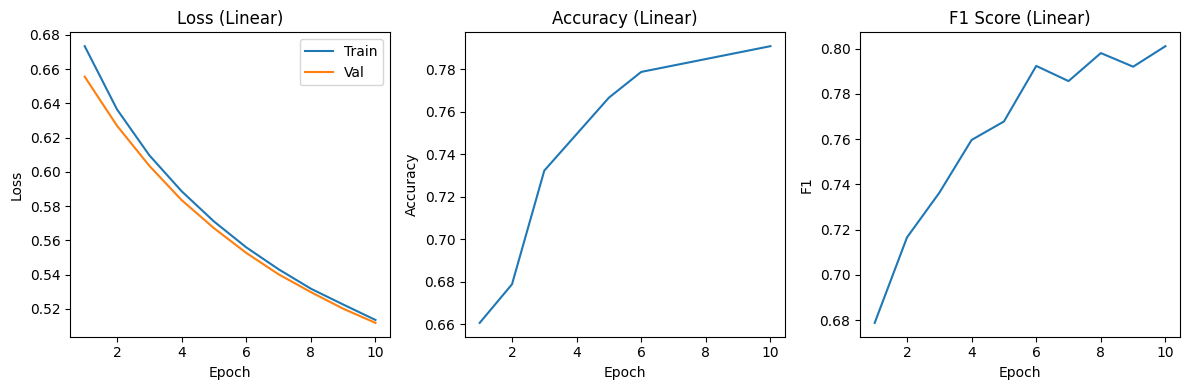


🔍 Test (Linear): Acc=0.802  Prec=0.791  Rec=0.823  F1=0.807


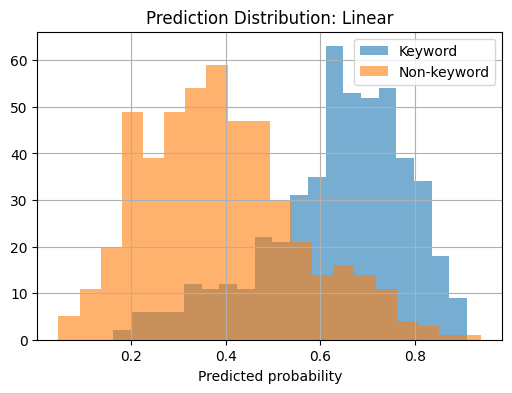

Epoch 1: Train Loss=153.1523, Val Loss=17.1219, Val Acc=0.773, F1=0.780
Epoch 2: Train Loss=126.8083, Val Loss=14.7441, Val Acc=0.805, F1=0.814
Epoch 3: Train Loss=112.8817, Val Loss=13.3859, Val Acc=0.832, F1=0.834
Epoch 4: Train Loss=104.2369, Val Loss=12.4756, Val Acc=0.844, F1=0.845
Epoch 5: Train Loss=97.7184, Val Loss=11.7939, Val Acc=0.857, F1=0.861
Epoch 6: Train Loss=92.6551, Val Loss=11.3811, Val Acc=0.860, F1=0.857
Epoch 7: Train Loss=88.0498, Val Loss=10.7511, Val Acc=0.865, F1=0.866
Epoch 8: Train Loss=84.8467, Val Loss=10.4451, Val Acc=0.878, F1=0.878
Epoch 9: Train Loss=81.9212, Val Loss=9.9190, Val Acc=0.877, F1=0.880
Epoch 10: Train Loss=79.3028, Val Loss=9.6068, Val Acc=0.887, F1=0.889


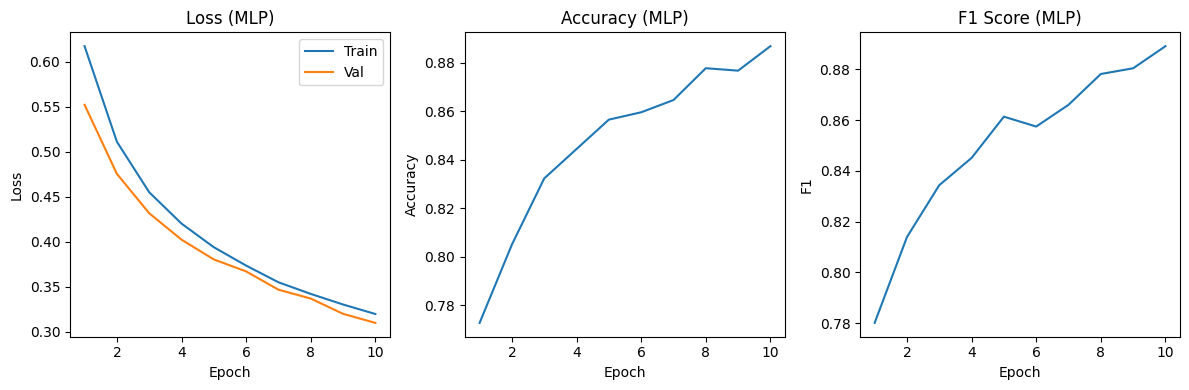


🔍 Test (MLP): Acc=0.887  Prec=0.886  Rec=0.889  F1=0.888


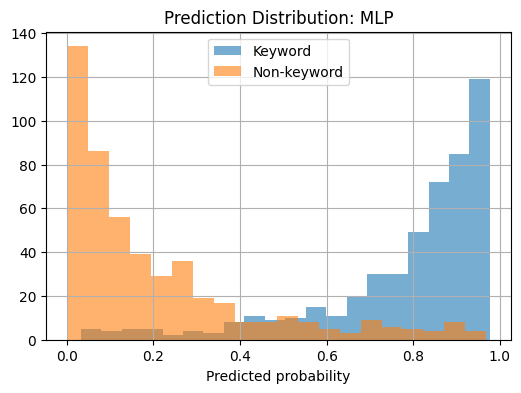

In [ ]:
# Cosine Classifier
cos_model = CosineClassifier(input_dim=X.shape[1]).to(device)
cos_hist = train_model(cos_model, train_loader, val_loader, epochs=10)
plot_history(cos_hist, title_suffix=" (Cosine)")
evaluate(cos_model, test_loader, name="Cosine")

# Linear Classifier
lin_model = LinearClassifier(input_dim=X.shape[1]).to(device)
lin_hist = train_model(lin_model, train_loader, val_loader, epochs=10)
plot_history(lin_hist, title_suffix=" (Linear)")
evaluate(lin_model, test_loader, name="Linear")

# MLPClassifier
mlp_model = MLPClassifier(input_dim=X.shape[1]).to(device)
mlp_hist = train_model(mlp_model, train_loader, val_loader, epochs=10)
plot_history(mlp_hist, title_suffix=" (MLP)")
evaluate(mlp_model, test_loader, name="MLP")

Performance of Wav2Vec2

/tmp/ipython-input-5-1436332199.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(data["labels"])


📍 Epoch 1: Loss=0.4754 | Acc=0.8476 | F1=0.8394
📍 Epoch 2: Loss=0.3475 | Acc=0.8845 | F1=0.8907
📍 Epoch 3: Loss=0.3015 | Acc=0.9036 | F1=0.9040
📍 Epoch 4: Loss=0.2739 | Acc=0.9016 | F1=0.9076
📍 Epoch 5: Loss=0.2525 | Acc=0.8951 | F1=0.8901
📍 Epoch 6: Loss=0.2390 | Acc=0.9082 | F1=0.9064
📍 Epoch 7: Loss=0.2210 | Acc=0.9132 | F1=0.9120
📍 Epoch 8: Loss=0.2200 | Acc=0.9233 | F1=0.9228
📍 Epoch 9: Loss=0.2148 | Acc=0.9168 | F1=0.9198
📍 Epoch 10: Loss=0.1973 | Acc=0.9243 | F1=0.9245
📍 Epoch 11: Loss=0.1885 | Acc=0.9173 | F1=0.9191
📍 Epoch 12: Loss=0.1898 | Acc=0.9258 | F1=0.9276
📍 Epoch 13: Loss=0.1726 | Acc=0.9077 | F1=0.9131
📍 Epoch 14: Loss=0.1747 | Acc=0.9132 | F1=0.9174
📍 Epoch 15: Loss=0.1659 | Acc=0.9223 | F1=0.9235
⏹️ Early stopping at epoch 15

✅ Best model saved to: /content/drive/MyDrive/Phonetics_Lab/models/best_mlp_model.pt


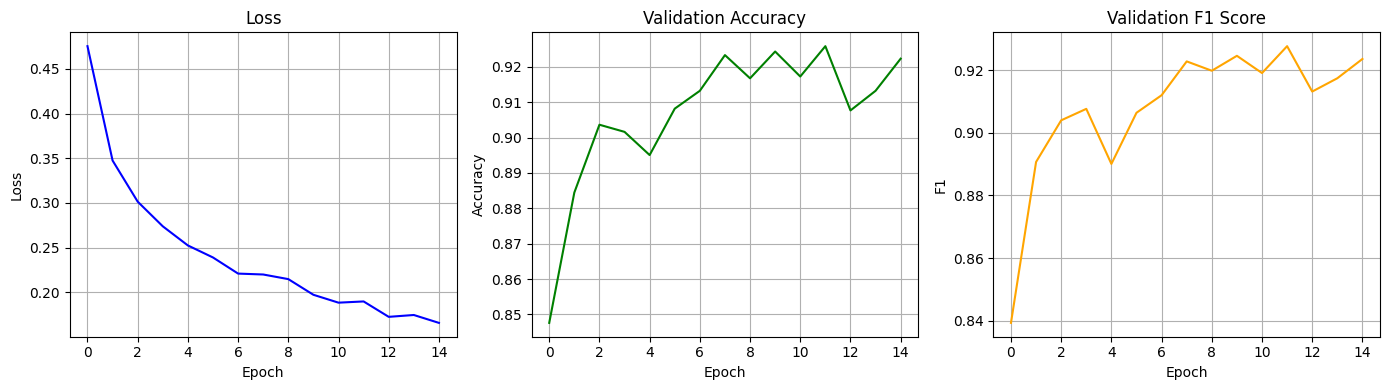

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import os

data = torch.load("/content/drive/MyDrive/Phonetics_Lab/wav2vec2_embeddings.pt")
X = data["embeddings"]
y = torch.tensor(data["labels"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, output_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

model = MLPClassifier(input_dim=X.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

epochs = 20
patience = 3
best_f1 = 0
epochs_no_improve = 0

train_losses, val_accuracies, val_f1s = [], [], []

model_path = "/content/drive/MyDrive/Phonetics_Lab/models/best_mlp_model.pt"

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_losses.append(total_loss / len(train_loader))

    # --- Validation ---
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(dim=1)
            all_preds.extend(preds.cpu())
            all_targets.extend(yb.cpu())

    acc = accuracy_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)
    val_accuracies.append(acc)
    val_f1s.append(f1)

    print(f"📍 Epoch {epoch+1}: Loss={train_losses[-1]:.4f} | Acc={acc:.4f} | F1={f1:.4f}")

    # --- Early Stopping + Save Best ---
    if f1 > best_f1:
        best_f1 = f1
        epochs_no_improve = 0
        torch.save(model.state_dict(), model_path)
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"⏹️ Early stopping at epoch {epoch+1}")
            break

print(f"\n✅ Best model saved to: {model_path}")

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label="Train Loss", color="blue")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(val_accuracies, label="Accuracy", color="green")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(val_f1s, label="F1 Score", color="orange")
plt.title("Validation F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1")
plt.grid(True)

plt.tight_layout()
plt.show()


12-layer model

In [ ]:
import torch
import torchaudio
import os
from tqdm import tqdm
from transformers import Wav2Vec2Processor, Wav2Vec2Model

positive_dir = "/content/drive/MyDrive/Phonetics_Lab/DATASET/label_1"
negative_dir = "/content/drive/MyDrive/Phonetics_Lab/DATASET/label_0"
output_path = "/content/drive/MyDrive/Phonetics_Lab/12layers_wav2vec2_embeddings.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"
processor = Wav2Vec2Processor.from_pretrained("jonatasgrosman/wav2vec2-large-xlsr-53-russian")
model = Wav2Vec2Model.from_pretrained("jonatasgrosman/wav2vec2-large-xlsr-53-russian").to(device)

# first 12 layers
model.encoder.layers = torch.nn.ModuleList(list(model.encoder.layers[:12]))
model.eval()

features = []
labels = []
filenames = []

def extract_embedding_wav2vec2(filepath):
    speech_array, sr = torchaudio.load(filepath)
    if sr != 16000:
        resampler = torchaudio.transforms.Resample(sr, 16000)
        speech_array = resampler(speech_array)
    speech_array = speech_array.squeeze().numpy()
    inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = model(**inputs.to(device))
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu()

for label, folder in [(1, positive_dir), (0, negative_dir)]:
    for fname in tqdm(os.listdir(folder), desc=f"Processing {folder}"):
        if not fname.endswith(".wav"):
            continue
        path = os.path.join(folder, fname)
        try:
            emb = extract_embedding_wav2vec2(path)
            features.append(emb)
            labels.append(label)
            filenames.append(fname)
        except Exception as e:
            print(f"Failed: {fname} | Error: {e}")

torch.save({
    "embeddings": torch.stack(features),
    "labels": torch.tensor(labels),
    "filenames": filenames
}, output_path)

print(f"Saved 12-layer Wav2Vec2 embeddings to {output_path}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_1: 100%|██████████| 4976/4976 [03:08<00:00, 26.38it/s]
Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   4%|▎         | 177/4972 [01:21<01:31, 52.41it/s]

Failed: видео_38412558-9f77-4d5a-a74a-41bbc60f5c81_chunk3.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   5%|▌         | 256/4972 [01:23<02:07, 37.06it/s]

Failed: люди_794768ce-a3bc-49ce-a901-a38849bfb7fd_chunk2.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   5%|▌         | 269/4972 [01:23<02:06, 37.03it/s]

Failed: вот_67800255-cda0-410c-ad1b-b1a4e26ae394_chunk1.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   8%|▊         | 420/4972 [01:27<01:39, 45.90it/s]

Failed: а_9ed3336a-0088-4b81-a5d8-a5aa4bf77d7d_chunk2.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   9%|▉         | 455/4972 [01:27<01:43, 43.70it/s]

Failed: а_09ed7fea-adbf-491d-80b4-602fd48eedb6_chunk21.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  11%|█         | 525/4972 [01:29<01:42, 43.25it/s]

Failed: ты_84cbae83-dece-4dbd-9c2e-532acbdd1f0a_chunk6.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  12%|█▏        | 596/4972 [01:31<01:43, 42.17it/s]

Failed: на_5e9ca5a8-c757-4bcb-a60e-80fe9c950b2d_chunk4.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  14%|█▎        | 683/4972 [01:32<01:05, 65.00it/s]

Failed: у_6a14483b-d557-44a0-a5ad-e519b6d1661f_chunk12.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  15%|█▍        | 744/4972 [01:33<01:08, 62.05it/s]

Failed: у_037bd8e9-2731-4494-8bb7-b6b00c2f0892_chunk3.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  22%|██▏       | 1089/4972 [01:39<01:04, 60.31it/s]

Failed: то_e55f6bd5-a3fe-478a-b29c-db777881f6c3_chunk6.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  23%|██▎       | 1136/4972 [01:40<01:03, 60.50it/s]

Failed: будут_36ce9aa0-2113-4641-a1c9-f163ce0659b8_chunk15.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  25%|██▍       | 1228/4972 [01:42<01:11, 52.11it/s]

Failed: у_78853007-6fa6-4089-abc2-56614bd8c248_chunk4.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  26%|██▋       | 1308/4972 [01:44<01:26, 42.16it/s]

Failed: что_03e0ba08-5b42-4b24-9efd-00149087d712_chunk2.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  29%|██▉       | 1462/4972 [01:48<01:18, 44.77it/s]

Failed: такие_e0fa12fe-c8e6-4e89-923d-1ed437dfe80c_chunk19.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  30%|███       | 1508/4972 [01:49<01:19, 43.73it/s]

Failed: типа_f41676ac-bdf5-449d-81f1-faa7c6ba88b4_chunk12.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  36%|███▌      | 1768/4972 [01:53<00:51, 61.93it/s]

Failed: наверное_29d78e1c-ec77-416b-9925-d5c884e695cb_chunk1.wav | Error: Failed to decode audio.
Failed: Если_4ab46734-2112-4d66-8862-ae32293bef92_chunk5.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  40%|████      | 2003/4972 [01:58<00:48, 60.97it/s]

Failed: у_20c531f4-9e6f-4cf0-bb20-70a672339d84_chunk7.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  42%|████▏     | 2066/4972 [01:59<00:47, 61.44it/s]

Failed: до_0ccc2e18-ae07-4ce5-a74f-1c8b4a4b9e03_chunk16.wav | Error: Failed to decode audio.
Failed: то_03e65e9b-3614-4c08-8458-6bfd1a86dfe5_chunk12.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  45%|████▌     | 2243/4972 [02:02<01:02, 43.43it/s]

Failed: там_44e51e95-3a54-4d1f-b903-f2a271609b74_chunk10.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  46%|████▋     | 2307/4972 [02:04<01:03, 42.13it/s]

Failed: у_e87a6a73-4a98-4d22-b15c-85bae39c4220_chunk13.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  47%|████▋     | 2338/4972 [02:04<01:02, 42.42it/s]

Failed: и_aca631de-92f6-44a7-8c47-4ac51c47a990_chunk13.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  51%|█████▏    | 2550/4972 [02:09<00:43, 55.61it/s]

Failed: а_63aa027d-f5fe-4386-a2ee-e8ca00e9aee8_chunk5.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  56%|█████▌    | 2783/4972 [02:13<00:37, 58.68it/s]

Failed: с_f6efc680-8c36-4d92-a9f8-6237cf7935c8_chunk0.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  59%|█████▉    | 2942/4972 [02:16<00:34, 58.15it/s]

Failed: ты_aff8dc50-2a16-4d6d-bd94-132ac49a093b_chunk1.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  61%|██████    | 3033/4972 [02:17<00:32, 60.48it/s]

Failed: чтобы_1bf46ace-81fb-4b0f-b3c0-bfe3c6303431_chunk12.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  62%|██████▏   | 3100/4972 [02:19<00:37, 50.45it/s]

Failed: ну_3cd481a3-5ea2-4b50-90c2-d46022020017_chunk2.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  64%|██████▍   | 3187/4972 [02:21<00:43, 41.17it/s]

Failed: ни_caadcf16-61fd-4649-9300-e60afa3c2a6e_chunk9.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  66%|██████▌   | 3283/4972 [02:22<00:27, 60.37it/s]

Failed: мы_56756ecd-3108-4111-8840-0aabd81dc8ce_chunk3.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  73%|███████▎  | 3651/4972 [02:29<00:22, 58.10it/s]

Failed: да_0c65c45e-7ad3-4ec3-9d25-17d3b4b0b9d6_chunk11.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  74%|███████▍  | 3670/4972 [02:29<00:22, 57.29it/s]

Failed: х_f87d73d0-16c6-4e51-86db-d2daea7b7bba_chunk5.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  75%|███████▌  | 3735/4972 [02:30<00:20, 58.98it/s]

Failed: ну_d36879ed-d28c-48c4-aaf3-5674592edac0_chunk4.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  85%|████████▍ | 4221/4972 [02:40<00:12, 60.27it/s]

Failed: все_dfd41231-52fd-4da9-bd14-5f108eabaf21_chunk3.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  92%|█████████▏| 4579/4972 [02:46<00:07, 51.58it/s]

Failed: говорю_c3488c07-2fd1-47d8-8931-797c0bd3ad99_chunk15.wav | Error: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  97%|█████████▋| 4804/4972 [02:51<00:02, 60.14it/s]

Failed: вот_33a4cffa-1840-463c-8e2e-c7ef1a11251f_chunk4.wav | Error: Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0: 100%|██████████| 4972/4972 [02:54<00:00, 28.56it/s]


Saved 12-layer Wav2Vec2 embeddings to /content/drive/MyDrive/Phonetics_Lab/12layers_wav2vec2_embeddings.pt


📍 Epoch 1: Loss=0.0828 | Val Acc=0.9000 | Val F1=0.9049
📍 Epoch 2: Loss=0.0575 | Val Acc=0.9051 | Val F1=0.9115
✅ Accuracy improved (0.9000 → 0.9051). Saving model.
📍 Epoch 3: Loss=0.0502 | Val Acc=0.9172 | Val F1=0.9207
✅ Accuracy improved (0.9051 → 0.9172). Saving model.
📍 Epoch 4: Loss=0.0456 | Val Acc=0.9172 | Val F1=0.9204
✅ Accuracy improved (0.9172 → 0.9172). Saving model.
📍 Epoch 5: Loss=0.0418 | Val Acc=0.9111 | Val F1=0.9176
⏳ EarlyStopping counter: 1 of 5
📍 Epoch 6: Loss=0.0391 | Val Acc=0.9152 | Val F1=0.9180
⏳ EarlyStopping counter: 2 of 5
📍 Epoch 7: Loss=0.0353 | Val Acc=0.9182 | Val F1=0.9231
✅ Accuracy improved (0.9172 → 0.9182). Saving model.
📍 Epoch 8: Loss=0.0332 | Val Acc=0.9152 | Val F1=0.9245
⏳ EarlyStopping counter: 1 of 5
📍 Epoch 9: Loss=0.0296 | Val Acc=0.9131 | Val F1=0.9211
⏳ EarlyStopping counter: 2 of 5
📍 Epoch 10: Loss=0.0278 | Val Acc=0.9222 | Val F1=0.9272
✅ Accuracy improved (0.9182 → 0.9222). Saving model.
📍 Epoch 11: Loss=0.0255 | Val Acc=0.9273 | Val

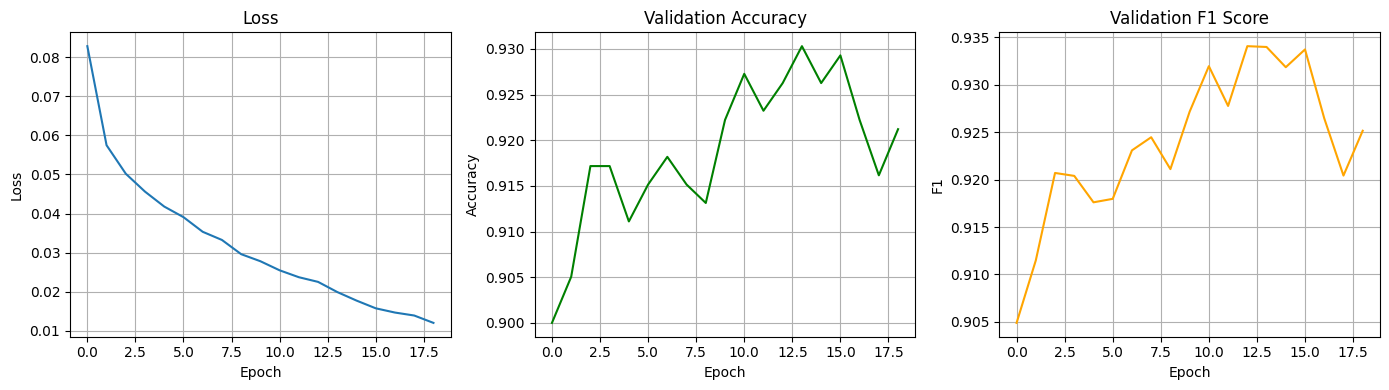

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# --- Focal Loss ---
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.ce = nn.CrossEntropyLoss(reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean() if self.reduction == 'mean' else focal_loss.sum()

# --- EarlyStopping ---
class EarlyStopping:
    def __init__(self, patience=5, delta=0.0, path='best_model.pt', verbose=True):
        self.patience = patience
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.verbose = verbose

    def __call__(self, val_acc, model):
        score = val_acc
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"⏳ EarlyStopping counter: {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            if self.verbose:
                print(f"✅ Accuracy improved ({self.best_score:.4f} → {score:.4f}). Saving model.")
            self.best_score = score
            self.save_checkpoint(model)
            self.counter = 0

    def save_checkpoint(self, model):
        torch.save(model.state_dict(), self.path)

# --- 1. Loading embeddings ---
data = torch.load("/content/drive/MyDrive/Phonetics_Lab/12layers_wav2vec2_embeddings.pt")
X = data["embeddings"]
y = data["labels"].clone().detach() if isinstance(data["labels"], torch.Tensor) else torch.tensor(data["labels"])

# --- 2. Division train / val / test (80 / 10 / 10) ---
total_size = len(X)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

dataset = TensorDataset(X, y)
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size],
                                                        generator=torch.Generator().manual_seed(42))

# --- 3. DataLoaders ---
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# --- 4. MLP-classifier ---
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, output_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = MLPClassifier(input_dim=X.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --- 5. Optimizer and Focal Loss ---
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = FocalLoss(alpha=1, gamma=2)

# --- 6. Learning + EarlyStopping ---
epochs = 30
train_losses, val_accuracies, val_f1s = [], [], []

model_path = "/content/drive/MyDrive/Phonetics_Lab/models/12layers_wav2vec2.pt"
early_stopper = EarlyStopping(patience=5, path=model_path)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_losses.append(total_loss / len(train_loader))

# Validation
    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(dim=1)
            all_preds.extend(preds.cpu())
            all_targets.extend(yb.cpu())

    acc = accuracy_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)
    val_accuracies.append(acc)
    val_f1s.append(f1)

    print(f"📍 Epoch {epoch+1}: Loss={train_losses[-1]:.4f} | Val Acc={acc:.4f} | Val F1={f1:.4f}")

    early_stopper(acc, model)
    if early_stopper.early_stop:
        print("🛑 Early stopping triggered.")
        break

print(f"✅ Best model saved at {model_path}")

# --- 7. Visualization ---
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label="Train Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(val_accuracies, label="Val Accuracy", color="green")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(val_f1s, label="Val F1 Score", color="orange")
plt.title("Validation F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1")
plt.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2-957423581.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(data["labels"])


✅ Accuracy: 0.9476
✅ F1 Score: 0.9474

📊 Classification Report:
               precision    recall  f1-score   support

 non-keyword       0.95      0.95      0.95       498
     keyword       0.95      0.95      0.95       494

    accuracy                           0.95       992
   macro avg       0.95      0.95      0.95       992
weighted avg       0.95      0.95      0.95       992



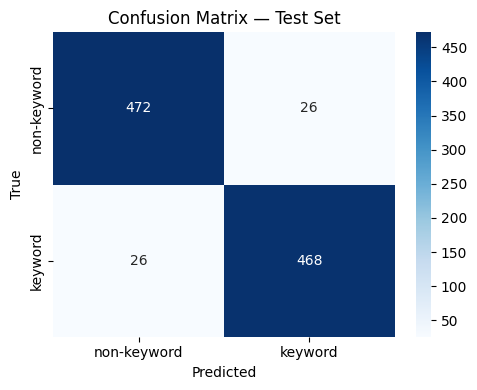

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

model_path = "/content/drive/MyDrive/Phonetics_Lab/models/12layers_wav2vec2.pt"
embedding_path = "/content/drive/MyDrive/Phonetics_Lab/12layers_wav2vec2_embeddings.pt"

data = torch.load(embedding_path)
X = data["embeddings"]
y = torch.tensor(data["labels"])

total_size = len(X)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

dataset = TensorDataset(X, y)
_, _, test_dataset = random_split(dataset, [train_size, val_size, test_size],
                                  generator=torch.Generator().manual_seed(42))

test_loader = DataLoader(test_dataset, batch_size=32)

class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, output_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPClassifier(input_dim=X.shape[1])
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

# --- Predictions on the test set ---
all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb).argmax(dim=1)
        all_preds.extend(preds.cpu())
        all_targets.extend(yb.cpu())

# --- Metrics ---
acc = accuracy_score(all_targets, all_preds)
f1 = f1_score(all_targets, all_preds)
cm = confusion_matrix(all_targets, all_preds)
report = classification_report(all_targets, all_preds, target_names=["non-keyword", "keyword"])

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("\n📊 Classification Report:\n", report)

# --- Confusion Matrix ---
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["non-keyword", "keyword"],
            yticklabels=["non-keyword", "keyword"])
plt.title("Confusion Matrix — Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

10-14 layers

In [ ]:
import os
import torch
import torchaudio
from transformers import Wav2Vec2Model, Wav2Vec2Processor
from tqdm import tqdm

positive_dir = "/content/drive/MyDrive/Phonetics_Lab/DATASET/label_1"
negative_dir = "/content/drive/MyDrive/Phonetics_Lab/DATASET/label_0"
output_path = "/content/drive/MyDrive/Phonetics_Lab/1014_wav2vec2_embeddings.pt"


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = Wav2Vec2Processor.from_pretrained("jonatasgrosman/wav2vec2-large-xlsr-53-russian")
model = Wav2Vec2Model.from_pretrained("jonatasgrosman/wav2vec2-large-xlsr-53-russian", output_hidden_states=True).to(device)
model.eval()

embeddings = []
labels = []
filenames = []

def extract_layers_10_14_embedding(filepath):
    waveform, sr = torchaudio.load(filepath)
    if sr != 16000:
        resampler = torchaudio.transforms.Resample(sr, 16000)
        waveform = resampler(waveform)
    waveform = waveform.squeeze().numpy()
    inputs = processor(waveform, sampling_rate=16000, return_tensors="pt", padding=True)

    with torch.no_grad():
        outputs = model(**inputs.to(device))
        hidden_states = outputs.hidden_states[10:15]  # layers 10–14
        stacked = torch.stack(hidden_states)  # [5, batch, time, hidden]
        mean_time = stacked.mean(dim=2)
        mean_both = mean_time.mean(dim=0)
        return mean_both.squeeze().cpu()

for label, folder in [(1, positive_dir), (0, negative_dir)]:
    for fname in tqdm(os.listdir(folder), desc=f"Processing {folder}"):
        if not fname.endswith(".wav"):
            continue
        fpath = os.path.join(folder, fname)
        try:
            emb = extract_layers_10_14_embedding(fpath)
            embeddings.append(emb)
            labels.append(label)
            filenames.append(fname)
        except Exception as e:
            print(f"⚠️ Failed: {fname} — {e}")

torch.save({
    "embeddings": torch.stack(embeddings),
    "labels": torch.tensor(labels),
    "filenames": filenames
}, output_path)

print(f"✅ Saved to {output_path}")

Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_1: 100%|██████████| 4976/4976 [02:48<00:00, 29.46it/s]
Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   3%|▎         | 170/4972 [00:39<01:51, 43.24it/s]

⚠️ Failed: видео_38412558-9f77-4d5a-a74a-41bbc60f5c81_chunk3.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   5%|▌         | 254/4972 [00:41<02:19, 33.79it/s]

⚠️ Failed: люди_794768ce-a3bc-49ce-a901-a38849bfb7fd_chunk2.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   5%|▌         | 266/4972 [00:41<02:35, 30.32it/s]

⚠️ Failed: вот_67800255-cda0-410c-ad1b-b1a4e26ae394_chunk1.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   8%|▊         | 420/4972 [00:45<01:50, 41.19it/s]

⚠️ Failed: а_9ed3336a-0088-4b81-a5d8-a5aa4bf77d7d_chunk2.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:   9%|▉         | 455/4972 [00:46<01:47, 41.93it/s]

⚠️ Failed: а_09ed7fea-adbf-491d-80b4-602fd48eedb6_chunk21.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  11%|█         | 525/4972 [00:48<01:45, 42.34it/s]

⚠️ Failed: ты_84cbae83-dece-4dbd-9c2e-532acbdd1f0a_chunk6.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  12%|█▏        | 595/4972 [00:50<01:46, 41.25it/s]

⚠️ Failed: на_5e9ca5a8-c757-4bcb-a60e-80fe9c950b2d_chunk4.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  14%|█▎        | 680/4972 [00:52<01:41, 42.33it/s]

⚠️ Failed: у_6a14483b-d557-44a0-a5ad-e519b6d1661f_chunk12.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  15%|█▍        | 737/4972 [00:53<02:05, 33.81it/s]

⚠️ Failed: у_037bd8e9-2731-4494-8bb7-b6b00c2f0892_chunk3.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  22%|██▏       | 1087/4972 [01:03<01:31, 42.23it/s]

⚠️ Failed: то_e55f6bd5-a3fe-478a-b29c-db777881f6c3_chunk6.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  23%|██▎       | 1134/4972 [01:04<01:37, 39.22it/s]

⚠️ Failed: будут_36ce9aa0-2113-4641-a1c9-f163ce0659b8_chunk15.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  25%|██▍       | 1228/4972 [01:07<01:50, 33.98it/s]

⚠️ Failed: у_78853007-6fa6-4089-abc2-56614bd8c248_chunk4.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  26%|██▋       | 1311/4972 [01:09<01:29, 40.93it/s]

⚠️ Failed: что_03e0ba08-5b42-4b24-9efd-00149087d712_chunk2.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  29%|██▉       | 1460/4972 [01:13<01:25, 40.96it/s]

⚠️ Failed: такие_e0fa12fe-c8e6-4e89-923d-1ed437dfe80c_chunk19.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  30%|███       | 1509/4972 [01:14<01:26, 39.86it/s]

⚠️ Failed: типа_f41676ac-bdf5-449d-81f1-faa7c6ba88b4_chunk12.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  35%|███▌      | 1761/4972 [01:21<01:48, 29.58it/s]

⚠️ Failed: наверное_29d78e1c-ec77-416b-9925-d5c884e695cb_chunk1.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  36%|███▌      | 1770/4972 [01:21<01:32, 34.67it/s]

⚠️ Failed: Если_4ab46734-2112-4d66-8862-ae32293bef92_chunk5.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  40%|████      | 2000/4972 [01:27<01:11, 41.83it/s]

⚠️ Failed: у_20c531f4-9e6f-4cf0-bb20-70a672339d84_chunk7.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  41%|████▏     | 2060/4972 [01:29<01:08, 42.20it/s]

⚠️ Failed: до_0ccc2e18-ae07-4ce5-a74f-1c8b4a4b9e03_chunk16.wav — Failed to decode audio.
⚠️ Failed: то_03e65e9b-3614-4c08-8458-6bfd1a86dfe5_chunk12.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  45%|████▌     | 2242/4972 [01:34<01:26, 31.58it/s]

⚠️ Failed: там_44e51e95-3a54-4d1f-b903-f2a271609b74_chunk10.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  46%|████▋     | 2302/4972 [01:35<01:04, 41.45it/s]

⚠️ Failed: у_e87a6a73-4a98-4d22-b15c-85bae39c4220_chunk13.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  47%|████▋     | 2337/4972 [01:36<01:00, 43.37it/s]

⚠️ Failed: и_aca631de-92f6-44a7-8c47-4ac51c47a990_chunk13.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  51%|█████     | 2547/4972 [01:41<01:00, 39.98it/s]

⚠️ Failed: а_63aa027d-f5fe-4386-a2ee-e8ca00e9aee8_chunk5.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  56%|█████▌    | 2778/4972 [01:48<00:51, 43.00it/s]

⚠️ Failed: с_f6efc680-8c36-4d92-a9f8-6237cf7935c8_chunk0.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  59%|█████▉    | 2938/4972 [01:52<00:47, 42.54it/s]

⚠️ Failed: ты_aff8dc50-2a16-4d6d-bd94-132ac49a093b_chunk1.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  61%|██████    | 3030/4972 [01:54<00:47, 40.94it/s]

⚠️ Failed: чтобы_1bf46ace-81fb-4b0f-b3c0-bfe3c6303431_chunk12.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  62%|██████▏   | 3095/4972 [01:56<00:45, 41.38it/s]

⚠️ Failed: ну_3cd481a3-5ea2-4b50-90c2-d46022020017_chunk2.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  64%|██████▍   | 3186/4972 [01:58<00:57, 31.22it/s]

⚠️ Failed: ни_caadcf16-61fd-4649-9300-e60afa3c2a6e_chunk9.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  66%|██████▌   | 3280/4972 [02:01<00:43, 38.88it/s]

⚠️ Failed: мы_56756ecd-3108-4111-8840-0aabd81dc8ce_chunk3.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  73%|███████▎  | 3645/4972 [02:10<00:38, 34.16it/s]

⚠️ Failed: да_0c65c45e-7ad3-4ec3-9d25-17d3b4b0b9d6_chunk11.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  74%|███████▎  | 3662/4972 [02:11<00:37, 34.80it/s]

⚠️ Failed: х_f87d73d0-16c6-4e51-86db-d2daea7b7bba_chunk5.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  75%|███████▌  | 3733/4972 [02:13<00:34, 35.63it/s]

⚠️ Failed: ну_d36879ed-d28c-48c4-aaf3-5674592edac0_chunk4.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  85%|████████▍ | 4218/4972 [02:26<00:20, 37.11it/s]

⚠️ Failed: все_dfd41231-52fd-4da9-bd14-5f108eabaf21_chunk3.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  92%|█████████▏| 4578/4972 [02:35<00:09, 39.72it/s]

⚠️ Failed: говорю_c3488c07-2fd1-47d8-8931-797c0bd3ad99_chunk15.wav — Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  97%|█████████▋| 4805/4972 [02:41<00:04, 41.58it/s]

⚠️ Failed: вот_33a4cffa-1840-463c-8e2e-c7ef1a11251f_chunk4.wav — Failed to decode audio.


Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0: 100%|██████████| 4972/4972 [02:45<00:00, 30.00it/s]


✅ Saved to /content/drive/MyDrive/Phonetics_Lab/1014_wav2vec2_embeddings.pt


/tmp/ipython-input-3-2619428612.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(data["labels"])


📍 Epoch 1: Loss=0.1239 | Val Acc=0.9101 | Val F1=0.9147
📍 Epoch 2: Loss=0.0587 | Val Acc=0.9152 | Val F1=0.9188
📍 Epoch 3: Loss=0.0508 | Val Acc=0.9202 | Val F1=0.9258
📍 Epoch 4: Loss=0.0475 | Val Acc=0.9333 | Val F1=0.9375
📍 Epoch 5: Loss=0.0435 | Val Acc=0.9172 | Val F1=0.9225
⚠️ EarlyStopping counter: 1 of 3
📍 Epoch 6: Loss=0.0424 | Val Acc=0.9253 | Val F1=0.9294
⚠️ EarlyStopping counter: 2 of 3
📍 Epoch 7: Loss=0.0380 | Val Acc=0.9273 | Val F1=0.9318
⚠️ EarlyStopping counter: 3 of 3
⛔ Early stopping triggered.
✅ Best model saved at /content/drive/MyDrive/Phonetics_Lab/models/best_layers_10_14.pt


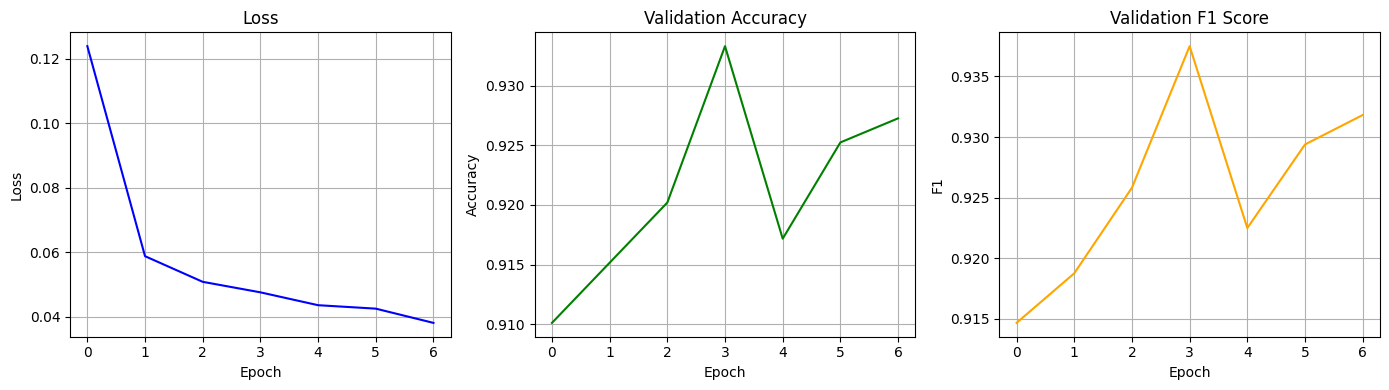

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import os

# --- Focal Loss ---
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.ce = nn.CrossEntropyLoss(reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean() if self.reduction == 'mean' else focal_loss.sum()

# --- 1. Load embeddings ---
data = torch.load("/content/drive/MyDrive/Phonetics_Lab/1014_wav2vec2_embeddings.pt")
X = data["embeddings"]
y = torch.tensor(data["labels"])

# --- 2. Split data 80/10/10 ---
total_size = len(X)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

dataset = TensorDataset(X, y)
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size],
                                                        generator=torch.Generator().manual_seed(42))

# --- 3. DataLoaders ---
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# --- 4. MLP Classifier ---
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, output_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = MLPClassifier(input_dim=X.shape[1])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --- 5. Optimizer and Loss ---
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = FocalLoss(alpha=1, gamma=2)

# --- 6. Training Loop with Early Stopping ---
epochs = 30
patience = 3
counter = 0
best_acc = 0.0
best_model_state = None

train_losses, val_accuracies, val_f1s = [], [], []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_losses.append(total_loss / len(train_loader))

    # --- Validation ---
    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(dim=1)
            all_preds.extend(preds.cpu())
            all_targets.extend(yb.cpu())

    acc = accuracy_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)
    val_accuracies.append(acc)
    val_f1s.append(f1)

    print(f"📍 Epoch {epoch+1}: Loss={train_losses[-1]:.4f} | Val Acc={acc:.4f} | Val F1={f1:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        print(f"⚠️ EarlyStopping counter: {counter} of {patience}")
        if counter >= patience:
            print("⛔ Early stopping triggered.")
            break

# --- 7. Save Best Model ---
model_path = "/content/drive/MyDrive/Phonetics_Lab/models/best_layers_10_14.pt"
os.makedirs(os.path.dirname(model_path), exist_ok=True)
torch.save(best_model_state, model_path)
print(f"✅ Best model saved at {model_path}")

# --- 8. Visualization ---
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label="Train Loss", color="blue")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(val_accuracies, label="Val Accuracy", color="green")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(val_f1s, label="Val F1 Score", color="orange")
plt.title("Validation F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1")
plt.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3-4179482761.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(data["labels"])


✅ Accuracy: 0.9405
✅ F1 Score: 0.9411

📊 Classification Report:
               precision    recall  f1-score   support

 non-keyword       0.95      0.93      0.94       498
     keyword       0.93      0.95      0.94       494

    accuracy                           0.94       992
   macro avg       0.94      0.94      0.94       992
weighted avg       0.94      0.94      0.94       992



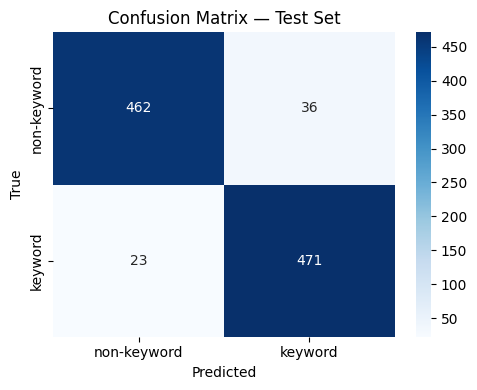

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

model_path = "/content/drive/MyDrive/Phonetics_Lab/models/best_layers_10_14.pt"
embedding_path = "/content/drive/MyDrive/Phonetics_Lab/1014_wav2vec2_embeddings.pt"

data = torch.load(embedding_path)
X = data["embeddings"]
y = torch.tensor(data["labels"])

total_size = len(X)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

dataset = TensorDataset(X, y)
_, _, test_dataset = random_split(dataset, [train_size, val_size, test_size],
                                  generator=torch.Generator().manual_seed(42))

test_loader = DataLoader(test_dataset, batch_size=32)

class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, output_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPClassifier(input_dim=X.shape[1])
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

all_preds, all_targets = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb).argmax(dim=1)
        all_preds.extend(preds.cpu())
        all_targets.extend(yb.cpu())

acc = accuracy_score(all_targets, all_preds)
f1 = f1_score(all_targets, all_preds)
cm = confusion_matrix(all_targets, all_preds)
report = classification_report(all_targets, all_preds, target_names=["non-keyword", "keyword"])

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("\n📊 Classification Report:\n", report)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["non-keyword", "keyword"],
            yticklabels=["non-keyword", "keyword"])
plt.title("Confusion Matrix — Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()